# **ML practice project description**
This project is designed to train any dataset on the following classifiers: **KNN**, **Naive Bayes**, and **Decision Tree**

The project is organized as follows:


1.   **KNN.py** class, to classify the dataset using k-nearset neighbor classifier.
2.   **NaibeBayes.py** class, to classify the dataset using naive bayes classifier.
3.   **DecisonTree.py** class, to classify the dataset using decision tree classifier.
4.   **Tools.py** class, this class contains general functions used by each classifier such as: 

    *   *train_test_split(dataset, test_size)*: to split dataset to train set and test set given split size
    *   *get_accuracy(y_true, y_predicted)*: to calculate accuracy on a test set by counting the number of correctly classified objects then divide by the total number of objects in the testset.
    *   *euclidean_distance(row1, row2)*: to estimate the eculdian distance between two instances. Used in KNN classifier. 
    *   *estimate_probability(x, mean, stdev)*: to estimate gaussian probability distruiton of an object x given mean and standard deviation.

5.    **Plot.py** class, to visualize dataset.
6.    **Driver.ipynb** notebook, to visualize, trian, and test classifiers on the dataset.

**The motivations behind using KNN is:**
1. Easy to implement
2. Makes no assumption about the underlying data pattern which means that it's non-parametric.
3. Can be used for both classification and Regression problems.
4. Based on feature similarity.
5. There is no explicit training phase or it is very minimal.

**The motivations behind using Naive Bayes is:**
1. Assumes that the features are independent.
2. Simple and fast.
3. Can be used for both binary and mult-iclass classification problems.
4. Can make probabilistic predictions.
5. Not sensitive to irrelevant features.

**The motivations behind using Naive Bayes is:**
1. Can handle continuous-valued, discrete, and categorical; there is no need to convert one type into another.
2. An intuitve classifier, as it can be traced as a sequence of choices.
3. The operation is very fast.
4. does not require normalization of data. 
5. Unstable classifier.

### Import modules

In [1]:
import pandas as pd
from Plot import Plot
import Tools
from KNN import KNN
from NaiveBayes import NaiveBayes
from DecisonTree import DecisonTree
print('Done importing')

Done importing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load data
 load dataset
 
 names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'class']
 
 dataset = pd.read_csv(filename.csv, names=[feature names])

In [2]:
names = []
num_of_features = 13
for i in range(num_of_features):
    x = 'x'+str(i+1)
    names.append(x)
names.append('class')
dataset = pd.read_csv('dataset.csv', names=names)
# IF DATASET FILE IS NOT SEPARATED BY COMMAS
# dataset =pd.read_csv('output_list.txt', sep=" ", names=names)
print(dataset.head())

   x1  x2  x3   x4   x5  x6  x7   x8  x9  x10  x11  x12  x13  class
0  63   1   3  145  233   1   0  150   0  2.3    0    0    1      1
1  37   1   2  130  250   0   1  187   0  3.5    0    0    2      1
2  41   0   1  130  204   0   0  172   0  1.4    2    0    2      1
3  56   1   1  120  236   0   1  178   0  0.8    2    0    2      1
4  57   0   0  120  354   0   1  163   1  0.6    2    0    2      1


### Extract labels from dataset

In [3]:
lbls = dataset['class'].unique()
print(lbls)

[1 0]


### visualize the whole dataset

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


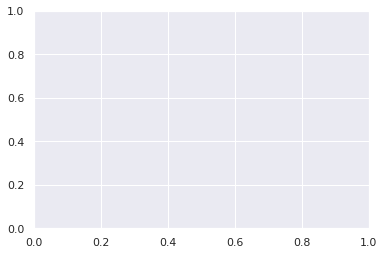

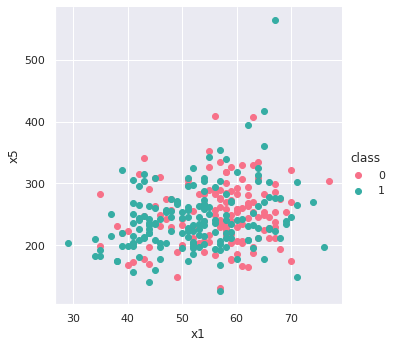

In [5]:
vis = Plot(lbls)
vis.visulaize(dataset,'x1','x5')

### Shuffle dataset
frac=1 means return all rows (in random order).

In [18]:
dataset_shuffle = dataset.sample(frac=1).reset_index(drop=True)
print(dataset_shuffle.head())

   x1  x2  x3   x4   x5  x6  x7   x8  x9  x10  x11  x12  x13  class
0  66   1   0  112  212   0   0  132   1  0.1    2    1    2      0
1  59   1   0  140  177   0   1  162   1  0.0    2    1    3      0
2  58   1   0  125  300   0   0  171   0  0.0    2    2    3      0
3  57   1   0  150  276   0   0  112   1  0.6    1    1    1      0
4  45   1   0  115  260   0   0  185   0  0.0    2    0    2      1


### Create Plot object, and plot sample data after shuffling
plt.show_plt(feature1_for_x-axis, feature2_for_y-axis, number_of_samples, shuffled_dataset)

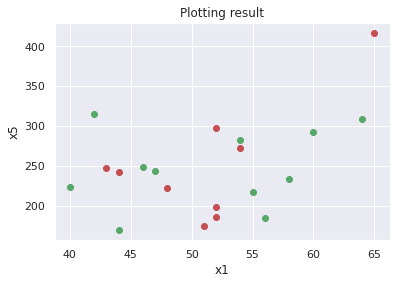

In [7]:
plt = Plot(lbls)
plt.show_plot('x1', 'x5', 20, dataset_shuffle)

### separate features from class label

In [ ]:
#x, y = Tools.get_features(dataset_shuffle,[0,1,2,3] ,4)
#print(x[0:5][:])
#print(y[0:5][:])

### train/test split

In [19]:
split_size = 0.40
train_set,test_set = Tools.train_test_split(dataset_shuffle,split_size)
print(len(train_set))
print(len(test_set))

181
122


### If there is non-mumerical labels, cast class labels to integers

In [ ]:
# Tools.str_to_int(train_set,len(train_set[0])-1)
# Tools.str_to_int(test_set,len(test_set[0])-1)

### Run classifier

In [20]:
knn_classifier = KNN(train_set,test_set,3)
accuracy_knn = knn_classifier.run()
print('KNN: ',accuracy_knn)

KNN:  66.39344262295081


In [21]:
dt_classifier = DecisonTree(train_set,test_set,5,10)
accuracy_dt = dt_classifier.run()
print('Decision Tree: ',accuracy_dt)

Decision Tree:  73.77049180327869


In [22]:
nb_classifier = NaiveBayes(train_set,test_set)
accuracy_nb = nb_classifier.run()
print('Naive Bayes: ',accuracy_nb)

Naive Bayes:  83.60655737704919
